In [82]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [135]:
# set color boundaries
lowerBound = np.array([115, 80, 80]) 
upperBound = np.array([140, 255, 255])

def roof_count(image):
    originalImage = cv2.imread(image)

    # convert image to hsv
    saturatedImage = cv2.cvtColor(originalImage, cv2.COLOR_RGB2HSV)

    # generate mask with the specified color range
    maskedImage = cv2.inRange(saturatedImage, lowerBound, upperBound)

    # segment the mask with the original image
    segmentedImage = cv2.bitwise_and(originalImage, originalImage, mask=maskedImage)

    grayImage = cv2.cvtColor(segmentedImage, cv2.COLOR_BGR2GRAY)

    # apply dilation se aplica dilatation to fill holes
    kernel = np.ones((4,4), np.uint8) 
    dilatedImage = cv2.dilate(grayImage, kernel, iterations=2)
    
    # find borders
    outlinedBoundaries = cv2.Canny(dilatedImage, 40, 130)
    
    # draw border on original image
    (cnts, _) = cv2.findContours(dilatedImage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(originalImage, cnts, -1, (0, 255, 0), 2)
    
    plt.imshow(originalImage)
    plt.show()

    plt.imshow(outlinedBoundaries)
    plt.show()
    
    plt.imshow(dilatedImage)
    plt.show()
    
    return len(cnts)
    

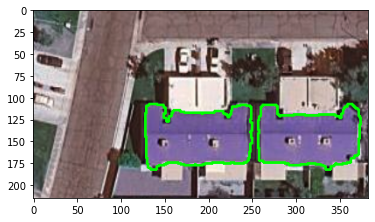

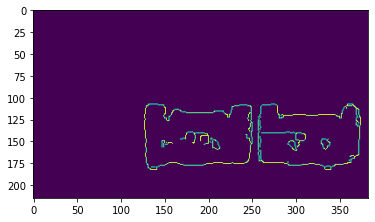

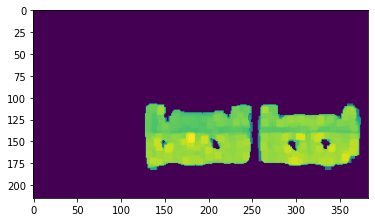

Se encontraron 2 casas


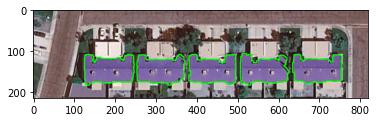

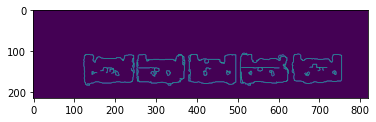

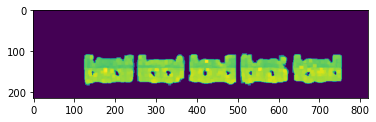

Se encontraron 5 casas


In [134]:
images = ['aerial-imagery-1.png', 'aerial-imagery-2.png']

for image in images:
    roofs = roof_count(image)
    print("Found %i houses" % roofs)
    